# Study of potential bias in the rental process
### Tyfenn Eloy, Mathias Berthonneau, Arthur-Louis Bonneau, Loris Nezan

In [17]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_low = pm4py.read_xes('data/renting_log_low.xes')
log_medium = pm4py.read_xes('data/renting_log_medium.xes')
log_high = pm4py.read_xes('data/renting_log_high.xes')

/home/loris/.local/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/home/loris/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 10000/10000 [00:03<00:00, 3171.24it/s]
/home/loris/.local/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/loris/.local/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format,

In [8]:
log_low.columns

Index(['activity', 'resource', 'time', 'concept:name', 'time:timestamp',
       '@@index', 'case:concept:name', 'case:german speaking',
       'case:yearsOfEducation', 'case:age', 'case:gender', 'case:citizen',
       'case:protected', 'case:married', 'case:@@case_index', 'case:case'],
      dtype='object')

## General trace analysis

In [9]:
CASE_ID_COL = 'concept:name'
ACTIVITY_COL = 'activity'
TIMESTAMP_COL = 'time:timestamp'

print(f"Case ID Column: {CASE_ID_COL}")
print(f"Activity Column: {ACTIVITY_COL}")
print(f"Timestamp Column: {TIMESTAMP_COL}")

Case ID Column: concept:name
Activity Column: activity
Timestamp Column: time:timestamp


Statistics for the `low` dataset:

In [10]:
num_cases = len(log_low.groupby(CASE_ID_COL))
num_events = len(log_low)

variants = pm4py.get_variants(log_low)
num_variants = len(variants)

print(f"Number of cases: {num_cases}")
print(f"Number of events: {num_events}")
print(f"Number of variants: {num_variants}")

Number of cases: 16
Number of events: 96440
Number of variants: 508


Statistics for the `medium` dataset:

In [11]:
num_cases = len(log_medium.groupby(CASE_ID_COL))
num_events = len(log_medium)

variants = pm4py.get_variants(log_medium)
num_variants = len(variants)

print(f"Number of cases: {num_cases}")
print(f"Number of events: {num_events}")
print(f"Number of variants: {num_variants}")

Number of cases: 16
Number of events: 105555
Number of variants: 610


Statistics for the `high` dataset:

In [12]:
num_cases = len(log_high.groupby(CASE_ID_COL))
num_events = len(log_high)

variants = pm4py.get_variants(log_high)
num_variants = len(variants)

print(f"Number of cases: {num_cases}")
print(f"Number of events: {num_events}")
print(f"Number of variants: {num_variants}")

Number of cases: 16
Number of events: 89972
Number of variants: 496


The general statistics of the different datasets are similar in term of size. We will be able to compare them easily.

## Drawing a general diagram of the flow

In [14]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

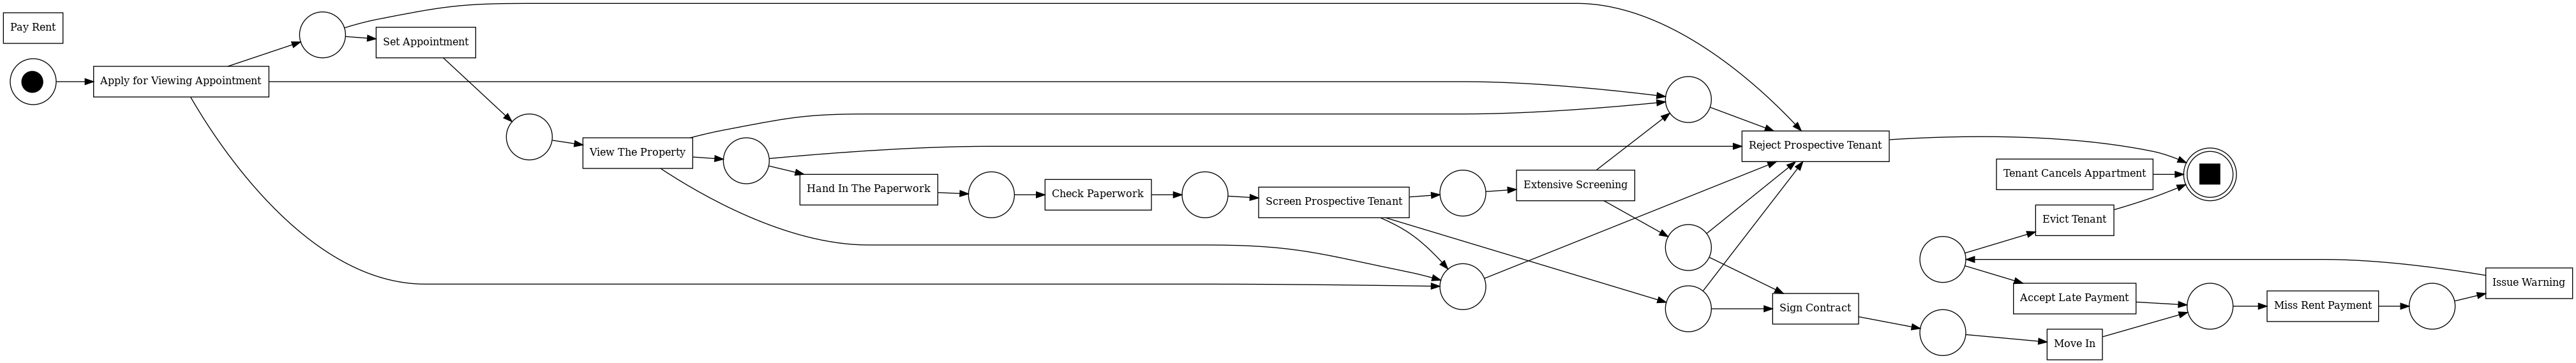

<Figure size 2000x2000 with 0 Axes>

In [18]:
net, initial_marking, final_marking = alpha_miner.apply(log_low)

pm4py.view_petri_net(net, initial_marking, final_marking)

In [27]:
# evaluate the model
from pm4py.conformance import conformance_diagnostics_token_based_replay

conformance_diagnostics_token_based_replay(log_low, net, initial_marking, final_marking)

replaying log with TBR, completed variants :: 100%|██████████| 508/508 [00:00<00:00, 2206.24it/s]


[{'trace_is_fit': False,
  'trace_fitness': 0.73125,
  'activated_transitions': [(Apply for Viewing Appointment, 'Apply for Viewing Appointment'),
   (Set Appointment, 'Set Appointment'),
   (View The Property, 'View The Property'),
   (Hand In The Paperwork, 'Hand In The Paperwork'),
   (Check Paperwork, 'Check Paperwork'),
   (Screen Prospective Tenant, 'Screen Prospective Tenant'),
   (Sign Contract, 'Sign Contract'),
   (Move In, 'Move In'),
   (Pay Rent, 'Pay Rent'),
   (Pay Rent, 'Pay Rent'),
   (Pay Rent, 'Pay Rent'),
   (Tenant Cancels Appartment, 'Tenant Cancels Appartment')],
  'reached_marking': ["({'Accept Late Payment', 'Move In'}, {'Miss Rent Payment'}):1", "({'Apply for Viewing Appointment', 'View The Property', 'Screen Prospective Tenant'}, {'Reject Prospective Tenant'}):3", "({'Extensive Screening', 'View The Property', 'Apply for Viewing Appointment'}, {'Reject Prospective Tenant'}):2", "({'Screen Prospective Tenant'}, {'Extensive Screening'}):1", 'end:1'],
  'enabled